In [1]:
import os
import json
import math
import numpy as np 
import pandas as pd

# ## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0001
# import seaborn as sns
# sns.reset_orig()
# sns.set()


## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms

C:\Users\Michał\AppData\Local\Temp\ipykernel_22808\292037682.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [2]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)

Device: cuda:0


## Przygotowanie danych

In [3]:
# Transformations applied on each image => only make them a tensor
transform = transforms.Compose([transforms.ToTensor()])

# Loading the training dataset. We need to split it into a training and validation part
train_dataset = FashionMNIST(root="data/", train=True, transform=transform, download=True)

# Loading the test set
test_set = FashionMNIST(root="data/", train=False, transform=transform, download=True)

# We define a set of data loaders that we can use for various purposes later.
train_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
test_loader = data.DataLoader(test_set, batch_size=256, shuffle=False, drop_last=False, num_workers=4)

def get_train_images(num):
    return torch.stack([test_set[i][0] for i in range(10,10+num)], dim=0)

# Generative Adversarial Networks

In [4]:
from src.gan.networks.generator import Generator
from src.gan.networks.discriminator import Discriminator

In [5]:
# Models
latent_dim = 32
generator = Generator(latent_dim=latent_dim, hidden_dim=40, output_dim=784).to(device)
discriminator = Discriminator( hidden_dim=40, input_dim=784).to(device)

# Optimizers
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
discriminator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=discriminator_optimizer, gamma=0.99)

# loss
criterion = nn.MSELoss()

In [6]:
fixed_noise = torch.randn(16, latent_dim,device=device)

In [7]:
fixed_noise.shape

torch.Size([16, 32])

Epoch: 0, discriminator fake error: 0.0626, discriminator real acc: 0.73


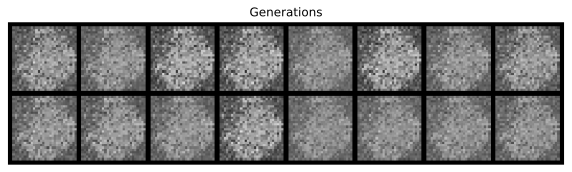

Epoch: 1, discriminator fake error: 0.0471, discriminator real acc: 0.849
Epoch: 2, discriminator fake error: 0.109, discriminator real acc: 0.772
Epoch: 3, discriminator fake error: 0.067, discriminator real acc: 0.886
Epoch: 4, discriminator fake error: 0.0371, discriminator real acc: 0.946
Epoch: 5, discriminator fake error: 0.0302, discriminator real acc: 0.956
Epoch: 6, discriminator fake error: 0.0304, discriminator real acc: 0.957
Epoch: 7, discriminator fake error: 0.0286, discriminator real acc: 0.961
Epoch: 8, discriminator fake error: 0.0308, discriminator real acc: 0.963
Epoch: 9, discriminator fake error: 0.0348, discriminator real acc: 0.962
Epoch: 10, discriminator fake error: 0.0416, discriminator real acc: 0.957


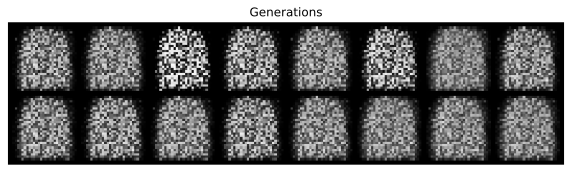

Epoch: 11, discriminator fake error: 0.0461, discriminator real acc: 0.955
Epoch: 12, discriminator fake error: 0.0529, discriminator real acc: 0.946
Epoch: 13, discriminator fake error: 0.0633, discriminator real acc: 0.933
Epoch: 14, discriminator fake error: 0.0749, discriminator real acc: 0.919
Epoch: 15, discriminator fake error: 0.0813, discriminator real acc: 0.917
Epoch: 16, discriminator fake error: 0.0705, discriminator real acc: 0.933
Epoch: 17, discriminator fake error: 0.0536, discriminator real acc: 0.939
Epoch: 18, discriminator fake error: 0.0822, discriminator real acc: 0.916
Epoch: 19, discriminator fake error: 0.0987, discriminator real acc: 0.909
Epoch: 20, discriminator fake error: 0.165, discriminator real acc: 0.863


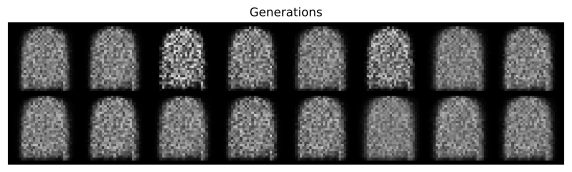

Epoch: 21, discriminator fake error: 0.159, discriminator real acc: 0.86
Epoch: 22, discriminator fake error: 0.139, discriminator real acc: 0.868
Epoch: 23, discriminator fake error: 0.126, discriminator real acc: 0.881
Epoch: 24, discriminator fake error: 0.102, discriminator real acc: 0.9
Epoch: 25, discriminator fake error: 0.0989, discriminator real acc: 0.897
Epoch: 26, discriminator fake error: 0.0775, discriminator real acc: 0.914
Epoch: 27, discriminator fake error: 0.0704, discriminator real acc: 0.925
Epoch: 28, discriminator fake error: 0.0674, discriminator real acc: 0.933
Epoch: 29, discriminator fake error: 0.086, discriminator real acc: 0.917
Epoch: 30, discriminator fake error: 0.0814, discriminator real acc: 0.921


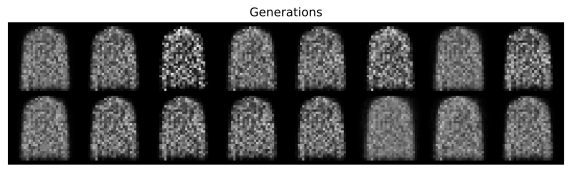

Epoch: 31, discriminator fake error: 0.0927, discriminator real acc: 0.913
Epoch: 32, discriminator fake error: 0.0898, discriminator real acc: 0.917
Epoch: 33, discriminator fake error: 0.0825, discriminator real acc: 0.924
Epoch: 34, discriminator fake error: 0.0736, discriminator real acc: 0.93
Epoch: 35, discriminator fake error: 0.0714, discriminator real acc: 0.927
Epoch: 36, discriminator fake error: 0.0764, discriminator real acc: 0.925
Epoch: 37, discriminator fake error: 0.066, discriminator real acc: 0.935
Epoch: 38, discriminator fake error: 0.076, discriminator real acc: 0.93
Epoch: 39, discriminator fake error: 0.0696, discriminator real acc: 0.927
Epoch: 40, discriminator fake error: 0.0699, discriminator real acc: 0.93


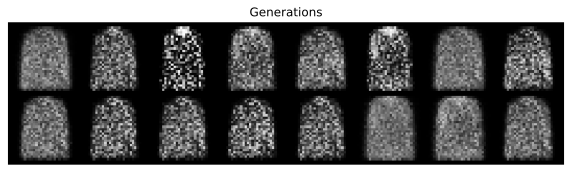

Epoch: 41, discriminator fake error: 0.0775, discriminator real acc: 0.926
Epoch: 42, discriminator fake error: 0.0892, discriminator real acc: 0.918
Epoch: 43, discriminator fake error: 0.0922, discriminator real acc: 0.914
Epoch: 44, discriminator fake error: 0.0755, discriminator real acc: 0.919
Epoch: 45, discriminator fake error: 0.0758, discriminator real acc: 0.924
Epoch: 46, discriminator fake error: 0.0786, discriminator real acc: 0.923
Epoch: 47, discriminator fake error: 0.0792, discriminator real acc: 0.925
Epoch: 48, discriminator fake error: 0.0585, discriminator real acc: 0.938
Epoch: 49, discriminator fake error: 0.069, discriminator real acc: 0.933
Epoch: 50, discriminator fake error: 0.0731, discriminator real acc: 0.931


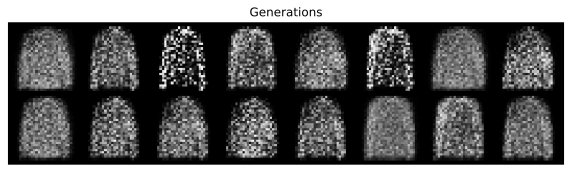

Epoch: 51, discriminator fake error: 0.0746, discriminator real acc: 0.924
Epoch: 52, discriminator fake error: 0.0759, discriminator real acc: 0.926
Epoch: 53, discriminator fake error: 0.0777, discriminator real acc: 0.93
Epoch: 54, discriminator fake error: 0.0752, discriminator real acc: 0.931
Epoch: 55, discriminator fake error: 0.0822, discriminator real acc: 0.926
Epoch: 56, discriminator fake error: 0.097, discriminator real acc: 0.911
Epoch: 57, discriminator fake error: 0.0803, discriminator real acc: 0.924
Epoch: 58, discriminator fake error: 0.0849, discriminator real acc: 0.922
Epoch: 59, discriminator fake error: 0.0837, discriminator real acc: 0.92
Epoch: 60, discriminator fake error: 0.0848, discriminator real acc: 0.918


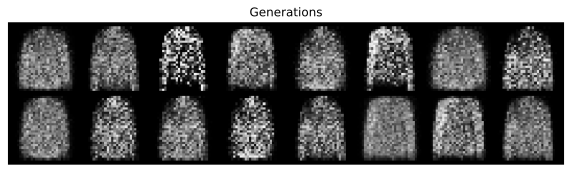

Epoch: 61, discriminator fake error: 0.0892, discriminator real acc: 0.918
Epoch: 62, discriminator fake error: 0.0986, discriminator real acc: 0.912
Epoch: 63, discriminator fake error: 0.103, discriminator real acc: 0.906
Epoch: 64, discriminator fake error: 0.0883, discriminator real acc: 0.912
Epoch: 65, discriminator fake error: 0.0992, discriminator real acc: 0.904
Epoch: 66, discriminator fake error: 0.106, discriminator real acc: 0.905
Epoch: 67, discriminator fake error: 0.0906, discriminator real acc: 0.916
Epoch: 68, discriminator fake error: 0.103, discriminator real acc: 0.902
Epoch: 69, discriminator fake error: 0.104, discriminator real acc: 0.903
Epoch: 70, discriminator fake error: 0.0995, discriminator real acc: 0.908


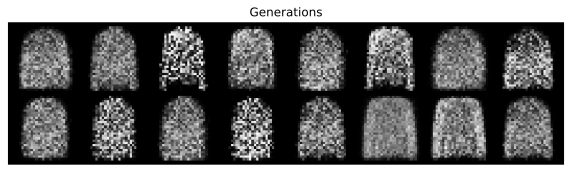

Epoch: 71, discriminator fake error: 0.0981, discriminator real acc: 0.908
Epoch: 72, discriminator fake error: 0.107, discriminator real acc: 0.899
Epoch: 73, discriminator fake error: 0.113, discriminator real acc: 0.888
Epoch: 74, discriminator fake error: 0.1, discriminator real acc: 0.905
Epoch: 75, discriminator fake error: 0.0951, discriminator real acc: 0.913
Epoch: 76, discriminator fake error: 0.106, discriminator real acc: 0.901
Epoch: 77, discriminator fake error: 0.109, discriminator real acc: 0.899
Epoch: 78, discriminator fake error: 0.103, discriminator real acc: 0.903
Epoch: 79, discriminator fake error: 0.0921, discriminator real acc: 0.905
Epoch: 80, discriminator fake error: 0.0908, discriminator real acc: 0.903


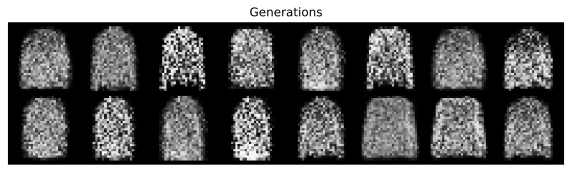

Epoch: 81, discriminator fake error: 0.0897, discriminator real acc: 0.913
Epoch: 82, discriminator fake error: 0.0907, discriminator real acc: 0.918
Epoch: 83, discriminator fake error: 0.0931, discriminator real acc: 0.915
Epoch: 84, discriminator fake error: 0.0926, discriminator real acc: 0.905
Epoch: 85, discriminator fake error: 0.0862, discriminator real acc: 0.911
Epoch: 86, discriminator fake error: 0.0853, discriminator real acc: 0.921
Epoch: 87, discriminator fake error: 0.0889, discriminator real acc: 0.921
Epoch: 88, discriminator fake error: 0.0976, discriminator real acc: 0.91
Epoch: 89, discriminator fake error: 0.0915, discriminator real acc: 0.91
Epoch: 90, discriminator fake error: 0.0851, discriminator real acc: 0.913


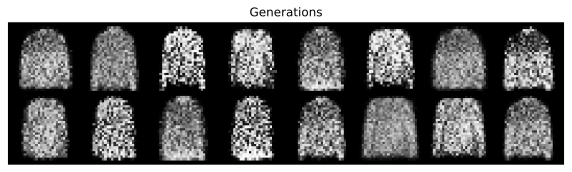

Epoch: 91, discriminator fake error: 0.0837, discriminator real acc: 0.916
Epoch: 92, discriminator fake error: 0.0869, discriminator real acc: 0.916
Epoch: 93, discriminator fake error: 0.0871, discriminator real acc: 0.917
Epoch: 94, discriminator fake error: 0.0827, discriminator real acc: 0.916
Epoch: 95, discriminator fake error: 0.0893, discriminator real acc: 0.914
Epoch: 96, discriminator fake error: 0.0867, discriminator real acc: 0.917
Epoch: 97, discriminator fake error: 0.087, discriminator real acc: 0.915
Epoch: 98, discriminator fake error: 0.0852, discriminator real acc: 0.917
Epoch: 99, discriminator fake error: 0.0846, discriminator real acc: 0.917
Epoch: 100, discriminator fake error: 0.0794, discriminator real acc: 0.923


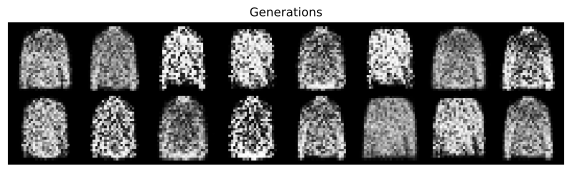

Epoch: 101, discriminator fake error: 0.0775, discriminator real acc: 0.926
Epoch: 102, discriminator fake error: 0.0781, discriminator real acc: 0.924
Epoch: 103, discriminator fake error: 0.0734, discriminator real acc: 0.928
Epoch: 104, discriminator fake error: 0.0751, discriminator real acc: 0.925
Epoch: 105, discriminator fake error: 0.0663, discriminator real acc: 0.929
Epoch: 106, discriminator fake error: 0.0685, discriminator real acc: 0.93
Epoch: 107, discriminator fake error: 0.0746, discriminator real acc: 0.93
Epoch: 108, discriminator fake error: 0.0722, discriminator real acc: 0.933
Epoch: 109, discriminator fake error: 0.0722, discriminator real acc: 0.93
Epoch: 110, discriminator fake error: 0.0821, discriminator real acc: 0.919


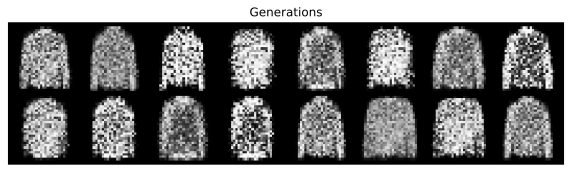

Epoch: 111, discriminator fake error: 0.0849, discriminator real acc: 0.915
Epoch: 112, discriminator fake error: 0.0824, discriminator real acc: 0.919
Epoch: 113, discriminator fake error: 0.0779, discriminator real acc: 0.925
Epoch: 114, discriminator fake error: 0.0712, discriminator real acc: 0.928
Epoch: 115, discriminator fake error: 0.0738, discriminator real acc: 0.928
Epoch: 116, discriminator fake error: 0.0732, discriminator real acc: 0.932
Epoch: 117, discriminator fake error: 0.0721, discriminator real acc: 0.931
Epoch: 118, discriminator fake error: 0.077, discriminator real acc: 0.925
Epoch: 119, discriminator fake error: 0.0868, discriminator real acc: 0.917
Epoch: 120, discriminator fake error: 0.0931, discriminator real acc: 0.908


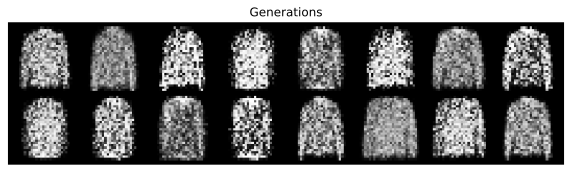

Epoch: 121, discriminator fake error: 0.0897, discriminator real acc: 0.909
Epoch: 122, discriminator fake error: 0.0826, discriminator real acc: 0.917
Epoch: 123, discriminator fake error: 0.0877, discriminator real acc: 0.916
Epoch: 124, discriminator fake error: 0.0869, discriminator real acc: 0.914
Epoch: 125, discriminator fake error: 0.0825, discriminator real acc: 0.916
Epoch: 126, discriminator fake error: 0.0826, discriminator real acc: 0.921
Epoch: 127, discriminator fake error: 0.0895, discriminator real acc: 0.916
Epoch: 128, discriminator fake error: 0.0977, discriminator real acc: 0.905
Epoch: 129, discriminator fake error: 0.0964, discriminator real acc: 0.906
Epoch: 130, discriminator fake error: 0.0955, discriminator real acc: 0.911


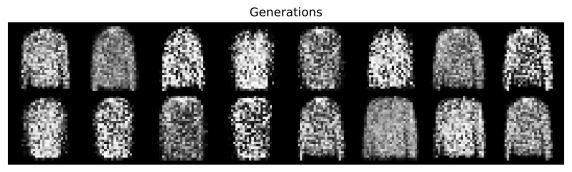

Epoch: 131, discriminator fake error: 0.0912, discriminator real acc: 0.913
Epoch: 132, discriminator fake error: 0.0868, discriminator real acc: 0.915
Epoch: 133, discriminator fake error: 0.0885, discriminator real acc: 0.914
Epoch: 134, discriminator fake error: 0.0924, discriminator real acc: 0.911
Epoch: 135, discriminator fake error: 0.0859, discriminator real acc: 0.916
Epoch: 136, discriminator fake error: 0.0888, discriminator real acc: 0.909
Epoch: 137, discriminator fake error: 0.092, discriminator real acc: 0.907
Epoch: 138, discriminator fake error: 0.083, discriminator real acc: 0.918
Epoch: 139, discriminator fake error: 0.0826, discriminator real acc: 0.921
Epoch: 140, discriminator fake error: 0.0859, discriminator real acc: 0.92


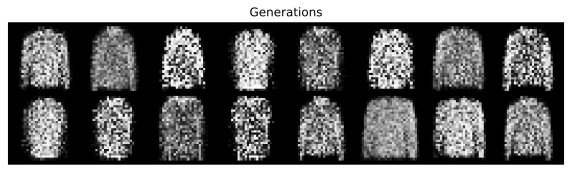

Epoch: 141, discriminator fake error: 0.0955, discriminator real acc: 0.908
Epoch: 142, discriminator fake error: 0.099, discriminator real acc: 0.904
Epoch: 143, discriminator fake error: 0.0861, discriminator real acc: 0.918
Epoch: 144, discriminator fake error: 0.0844, discriminator real acc: 0.917
Epoch: 145, discriminator fake error: 0.0808, discriminator real acc: 0.917
Epoch: 146, discriminator fake error: 0.0839, discriminator real acc: 0.914
Epoch: 147, discriminator fake error: 0.0835, discriminator real acc: 0.919
Epoch: 148, discriminator fake error: 0.0857, discriminator real acc: 0.918
Epoch: 149, discriminator fake error: 0.0848, discriminator real acc: 0.918
Epoch: 150, discriminator fake error: 0.0853, discriminator real acc: 0.916


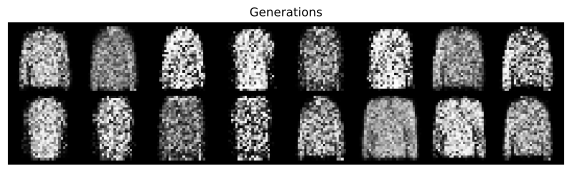

Epoch: 151, discriminator fake error: 0.079, discriminator real acc: 0.921
Epoch: 152, discriminator fake error: 0.0755, discriminator real acc: 0.921
Epoch: 153, discriminator fake error: 0.0753, discriminator real acc: 0.921
Epoch: 154, discriminator fake error: 0.0734, discriminator real acc: 0.926
Epoch: 155, discriminator fake error: 0.0754, discriminator real acc: 0.927
Epoch: 156, discriminator fake error: 0.0798, discriminator real acc: 0.925
Epoch: 157, discriminator fake error: 0.0805, discriminator real acc: 0.924
Epoch: 158, discriminator fake error: 0.0772, discriminator real acc: 0.924
Epoch: 159, discriminator fake error: 0.0786, discriminator real acc: 0.92
Epoch: 160, discriminator fake error: 0.0838, discriminator real acc: 0.913


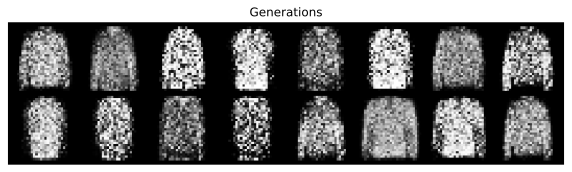

Epoch: 161, discriminator fake error: 0.0819, discriminator real acc: 0.916
Epoch: 162, discriminator fake error: 0.0769, discriminator real acc: 0.917
Epoch: 163, discriminator fake error: 0.0792, discriminator real acc: 0.914
Epoch: 164, discriminator fake error: 0.0838, discriminator real acc: 0.911
Epoch: 165, discriminator fake error: 0.0837, discriminator real acc: 0.916
Epoch: 166, discriminator fake error: 0.0837, discriminator real acc: 0.919
Epoch: 167, discriminator fake error: 0.0899, discriminator real acc: 0.909
Epoch: 168, discriminator fake error: 0.0961, discriminator real acc: 0.904
Epoch: 169, discriminator fake error: 0.0943, discriminator real acc: 0.913
Epoch: 170, discriminator fake error: 0.0878, discriminator real acc: 0.918


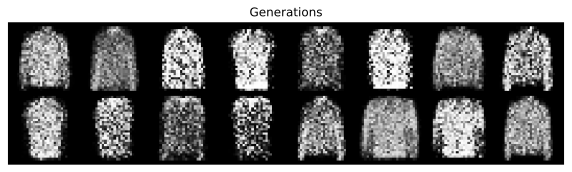

Epoch: 171, discriminator fake error: 0.0873, discriminator real acc: 0.912
Epoch: 172, discriminator fake error: 0.0909, discriminator real acc: 0.906
Epoch: 173, discriminator fake error: 0.0918, discriminator real acc: 0.91
Epoch: 174, discriminator fake error: 0.0865, discriminator real acc: 0.92
Epoch: 175, discriminator fake error: 0.0863, discriminator real acc: 0.92
Epoch: 176, discriminator fake error: 0.0893, discriminator real acc: 0.911
Epoch: 177, discriminator fake error: 0.0856, discriminator real acc: 0.911
Epoch: 178, discriminator fake error: 0.0849, discriminator real acc: 0.915
Epoch: 179, discriminator fake error: 0.0878, discriminator real acc: 0.914
Epoch: 180, discriminator fake error: 0.0874, discriminator real acc: 0.916


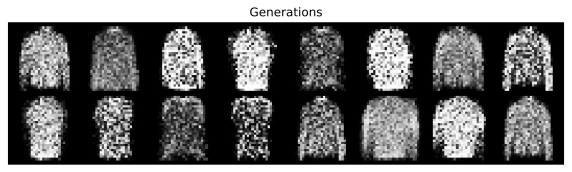

Epoch: 181, discriminator fake error: 0.0928, discriminator real acc: 0.912
Epoch: 182, discriminator fake error: 0.0916, discriminator real acc: 0.914
Epoch: 183, discriminator fake error: 0.0895, discriminator real acc: 0.916
Epoch: 184, discriminator fake error: 0.0907, discriminator real acc: 0.913
Epoch: 185, discriminator fake error: 0.0953, discriminator real acc: 0.906
Epoch: 186, discriminator fake error: 0.103, discriminator real acc: 0.901
Epoch: 187, discriminator fake error: 0.102, discriminator real acc: 0.903
Epoch: 188, discriminator fake error: 0.0905, discriminator real acc: 0.91
Epoch: 189, discriminator fake error: 0.0907, discriminator real acc: 0.908
Epoch: 190, discriminator fake error: 0.0987, discriminator real acc: 0.905


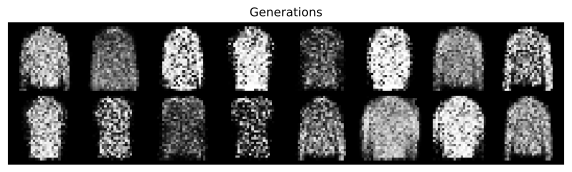

Epoch: 191, discriminator fake error: 0.0981, discriminator real acc: 0.911
Epoch: 192, discriminator fake error: 0.098, discriminator real acc: 0.91
Epoch: 193, discriminator fake error: 0.101, discriminator real acc: 0.904
Epoch: 194, discriminator fake error: 0.106, discriminator real acc: 0.897
Epoch: 195, discriminator fake error: 0.111, discriminator real acc: 0.893
Epoch: 196, discriminator fake error: 0.111, discriminator real acc: 0.896
Epoch: 197, discriminator fake error: 0.111, discriminator real acc: 0.893
Epoch: 198, discriminator fake error: 0.113, discriminator real acc: 0.888
Epoch: 199, discriminator fake error: 0.121, discriminator real acc: 0.88
Epoch: 200, discriminator fake error: 0.126, discriminator real acc: 0.879


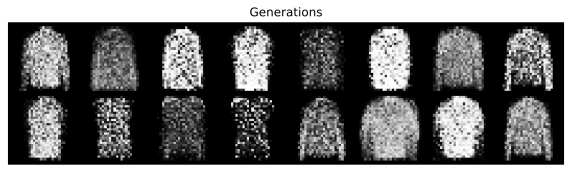

Epoch: 201, discriminator fake error: 0.128, discriminator real acc: 0.877
Epoch: 202, discriminator fake error: 0.13, discriminator real acc: 0.873
Epoch: 203, discriminator fake error: 0.127, discriminator real acc: 0.878
Epoch: 204, discriminator fake error: 0.126, discriminator real acc: 0.877
Epoch: 205, discriminator fake error: 0.129, discriminator real acc: 0.869
Epoch: 206, discriminator fake error: 0.133, discriminator real acc: 0.866
Epoch: 207, discriminator fake error: 0.138, discriminator real acc: 0.864
Epoch: 208, discriminator fake error: 0.143, discriminator real acc: 0.865
Epoch: 209, discriminator fake error: 0.142, discriminator real acc: 0.869
Epoch: 210, discriminator fake error: 0.145, discriminator real acc: 0.867


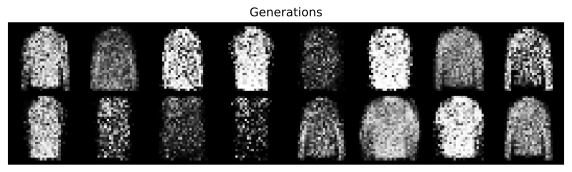

Epoch: 211, discriminator fake error: 0.146, discriminator real acc: 0.859
Epoch: 212, discriminator fake error: 0.138, discriminator real acc: 0.861
Epoch: 213, discriminator fake error: 0.144, discriminator real acc: 0.856
Epoch: 214, discriminator fake error: 0.152, discriminator real acc: 0.852
Epoch: 215, discriminator fake error: 0.147, discriminator real acc: 0.859
Epoch: 216, discriminator fake error: 0.142, discriminator real acc: 0.869
Epoch: 217, discriminator fake error: 0.14, discriminator real acc: 0.869
Epoch: 218, discriminator fake error: 0.148, discriminator real acc: 0.86
Epoch: 219, discriminator fake error: 0.151, discriminator real acc: 0.854
Epoch: 220, discriminator fake error: 0.148, discriminator real acc: 0.854


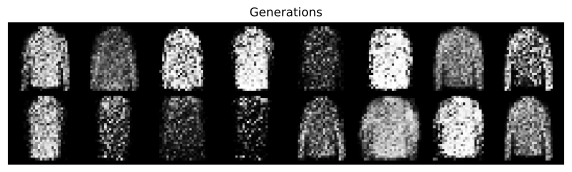

Epoch: 221, discriminator fake error: 0.142, discriminator real acc: 0.861
Epoch: 222, discriminator fake error: 0.142, discriminator real acc: 0.863
Epoch: 223, discriminator fake error: 0.139, discriminator real acc: 0.864
Epoch: 224, discriminator fake error: 0.131, discriminator real acc: 0.868
Epoch: 225, discriminator fake error: 0.134, discriminator real acc: 0.864
Epoch: 226, discriminator fake error: 0.136, discriminator real acc: 0.86
Epoch: 227, discriminator fake error: 0.14, discriminator real acc: 0.857
Epoch: 228, discriminator fake error: 0.138, discriminator real acc: 0.858
Epoch: 229, discriminator fake error: 0.135, discriminator real acc: 0.863
Epoch: 230, discriminator fake error: 0.131, discriminator real acc: 0.865


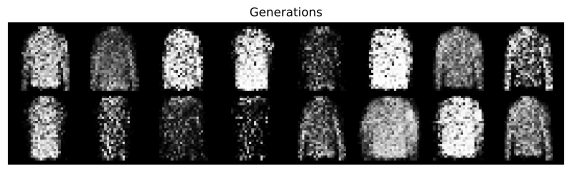

Epoch: 231, discriminator fake error: 0.132, discriminator real acc: 0.863
Epoch: 232, discriminator fake error: 0.139, discriminator real acc: 0.857
Epoch: 233, discriminator fake error: 0.137, discriminator real acc: 0.86
Epoch: 234, discriminator fake error: 0.142, discriminator real acc: 0.859
Epoch: 235, discriminator fake error: 0.147, discriminator real acc: 0.856
Epoch: 236, discriminator fake error: 0.15, discriminator real acc: 0.852
Epoch: 237, discriminator fake error: 0.15, discriminator real acc: 0.848
Epoch: 238, discriminator fake error: 0.143, discriminator real acc: 0.854
Epoch: 239, discriminator fake error: 0.147, discriminator real acc: 0.853
Epoch: 240, discriminator fake error: 0.157, discriminator real acc: 0.847


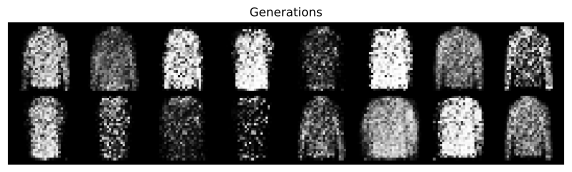

Epoch: 241, discriminator fake error: 0.153, discriminator real acc: 0.85
Epoch: 242, discriminator fake error: 0.146, discriminator real acc: 0.854
Epoch: 243, discriminator fake error: 0.143, discriminator real acc: 0.855
Epoch: 244, discriminator fake error: 0.137, discriminator real acc: 0.859
Epoch: 245, discriminator fake error: 0.141, discriminator real acc: 0.857
Epoch: 246, discriminator fake error: 0.153, discriminator real acc: 0.849
Epoch: 247, discriminator fake error: 0.155, discriminator real acc: 0.849
Epoch: 248, discriminator fake error: 0.151, discriminator real acc: 0.851
Epoch: 249, discriminator fake error: 0.152, discriminator real acc: 0.849
Epoch: 250, discriminator fake error: 0.146, discriminator real acc: 0.851


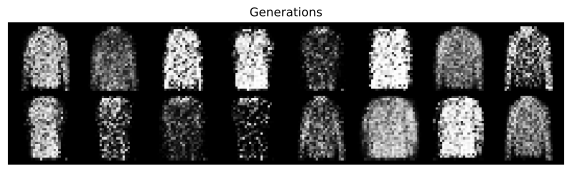

Epoch: 251, discriminator fake error: 0.145, discriminator real acc: 0.854
Epoch: 252, discriminator fake error: 0.155, discriminator real acc: 0.849
Epoch: 253, discriminator fake error: 0.161, discriminator real acc: 0.844
Epoch: 254, discriminator fake error: 0.15, discriminator real acc: 0.85
Epoch: 255, discriminator fake error: 0.143, discriminator real acc: 0.856
Epoch: 256, discriminator fake error: 0.144, discriminator real acc: 0.856
Epoch: 257, discriminator fake error: 0.145, discriminator real acc: 0.857
Epoch: 258, discriminator fake error: 0.149, discriminator real acc: 0.854
Epoch: 259, discriminator fake error: 0.157, discriminator real acc: 0.849
Epoch: 260, discriminator fake error: 0.164, discriminator real acc: 0.843


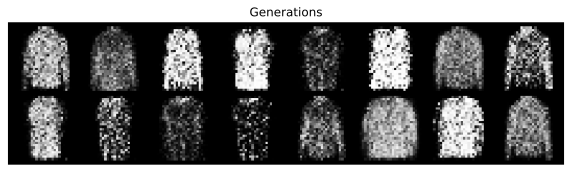

Epoch: 261, discriminator fake error: 0.164, discriminator real acc: 0.842
Epoch: 262, discriminator fake error: 0.162, discriminator real acc: 0.842
Epoch: 263, discriminator fake error: 0.158, discriminator real acc: 0.845
Epoch: 264, discriminator fake error: 0.151, discriminator real acc: 0.849
Epoch: 265, discriminator fake error: 0.151, discriminator real acc: 0.849
Epoch: 266, discriminator fake error: 0.154, discriminator real acc: 0.845
Epoch: 267, discriminator fake error: 0.155, discriminator real acc: 0.844
Epoch: 268, discriminator fake error: 0.151, discriminator real acc: 0.846
Epoch: 269, discriminator fake error: 0.148, discriminator real acc: 0.85
Epoch: 270, discriminator fake error: 0.148, discriminator real acc: 0.851


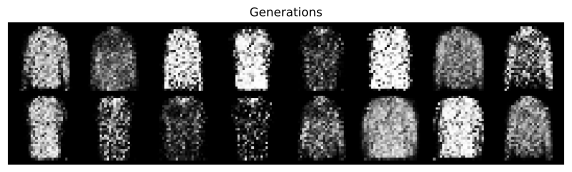

Epoch: 271, discriminator fake error: 0.154, discriminator real acc: 0.849
Epoch: 272, discriminator fake error: 0.157, discriminator real acc: 0.848
Epoch: 273, discriminator fake error: 0.156, discriminator real acc: 0.848
Epoch: 274, discriminator fake error: 0.156, discriminator real acc: 0.848
Epoch: 275, discriminator fake error: 0.158, discriminator real acc: 0.844
Epoch: 276, discriminator fake error: 0.162, discriminator real acc: 0.841
Epoch: 277, discriminator fake error: 0.166, discriminator real acc: 0.839
Epoch: 278, discriminator fake error: 0.162, discriminator real acc: 0.84
Epoch: 279, discriminator fake error: 0.157, discriminator real acc: 0.844
Epoch: 280, discriminator fake error: 0.153, discriminator real acc: 0.85


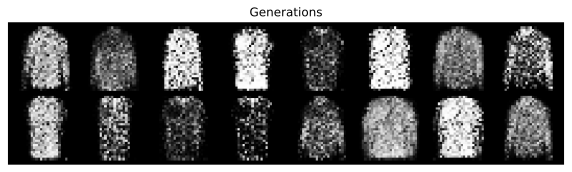

Epoch: 281, discriminator fake error: 0.152, discriminator real acc: 0.85
Epoch: 282, discriminator fake error: 0.153, discriminator real acc: 0.849
Epoch: 283, discriminator fake error: 0.153, discriminator real acc: 0.847
Epoch: 284, discriminator fake error: 0.157, discriminator real acc: 0.843
Epoch: 285, discriminator fake error: 0.158, discriminator real acc: 0.841
Epoch: 286, discriminator fake error: 0.158, discriminator real acc: 0.843
Epoch: 287, discriminator fake error: 0.158, discriminator real acc: 0.844
Epoch: 288, discriminator fake error: 0.162, discriminator real acc: 0.841
Epoch: 289, discriminator fake error: 0.164, discriminator real acc: 0.839
Epoch: 290, discriminator fake error: 0.161, discriminator real acc: 0.841


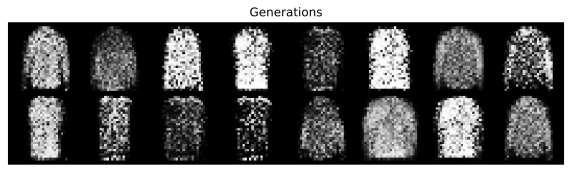

Epoch: 291, discriminator fake error: 0.158, discriminator real acc: 0.842
Epoch: 292, discriminator fake error: 0.156, discriminator real acc: 0.842
Epoch: 293, discriminator fake error: 0.152, discriminator real acc: 0.844
Epoch: 294, discriminator fake error: 0.148, discriminator real acc: 0.848
Epoch: 295, discriminator fake error: 0.147, discriminator real acc: 0.849
Epoch: 296, discriminator fake error: 0.15, discriminator real acc: 0.848
Epoch: 297, discriminator fake error: 0.154, discriminator real acc: 0.845
Epoch: 298, discriminator fake error: 0.159, discriminator real acc: 0.843
Epoch: 299, discriminator fake error: 0.161, discriminator real acc: 0.842


In [8]:
G_losses = []
D_losses = []
num_epochs = 300
for epoch in range(num_epochs):
    # For each batch in the dataloader
    discriminator_fake_acc = []
    discriminator_real_acc = []
    for i, data in enumerate(train_loader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        discriminator_optimizer.zero_grad()
        # Format batch
        real_images = data[0].to(device)
        b_size = real_images.size(0)
        label = torch.ones((b_size,), dtype=torch.float, device=device) # Setting labels for real images
        # Forward pass real batch through D
        output = discriminator(real_images).view(-1)
        # Calculate loss on all-real batch
        error_discriminator_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        error_discriminator_real.backward()
        discriminator_real_acc.append(output.mean().item())

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, latent_dim,device=device)
        # Generate fake image batch with Generator
        fake_images = generator(noise)
        label_fake = torch.zeros((b_size,), dtype=torch.float, device=device)
        # Classify all fake batch with Discriminator
        output = discriminator(fake_images.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        error_discriminator_fake = criterion(output, label_fake)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        error_discriminator_fake.backward()
        discriminator_fake_acc.append(output.mean().item())

        # Compute error of D as sum over the fake and the real batches
        error_discriminator = error_discriminator_real + error_discriminator_fake
        # Update D
        discriminator_optimizer.step()
        D_losses.append(error_discriminator.item())

    # for i, data in enumerate(train_loader, 0):
        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################

        real_images = data[0].to(device)
        b_size = real_images.size(0)
        generator_optimizer.zero_grad()
        noise = torch.randn(b_size, latent_dim,device=device)
        # Generate fake image batch with Generator
        fake_images = generator(noise)
        label = torch.ones((b_size,), dtype=torch.float, device=device)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = discriminator(fake_images).view(-1)
        # Calculate G's loss based on this output
        error_generator = criterion(output, label)
        # Calculate gradients for G
        error_generator.backward()
        D_G_z2 = output.mean().item()
        # Update G
        generator_optimizer.step()
        #
        # Output training stats
        # Save Losses for plotting later
        G_losses.append(error_generator.item())

    print(f"Epoch: {epoch}, discriminator fake error: {np.mean(discriminator_fake_acc):.3}, discriminator real acc: {np.mean(discriminator_real_acc):.3}")
    generator_scheduler.step()
    discriminator_scheduler.step()
    if epoch % 10 == 0:
        with torch.no_grad():
            fake = generator(fixed_noise).detach().cpu()
        grid = torchvision.utils.make_grid(fake)
        grid = grid.permute(1, 2, 0)
        plt.figure(figsize=(10,10))
        plt.title(f"Generations")
        plt.imshow(grid)
        plt.axis('off')
        plt.show()

In [9]:
torch.save(discriminator.state_dict(), "../pre-trained/discriminator")

In [13]:
discriminator.load_state_dict(torch.load("../pre-trained/discriminator"))

<All keys matched successfully>

In [10]:
torch.save(generator.state_dict(), "../pre-trained/generator")

In [57]:
generator.load_state_dict(torch.load("../src/gan/models/gan_ndes_generator_163288.1718697.pth.tar")['state_dict'])

<All keys matched successfully>

In [11]:
print(f"Num params: {sum([param.nelement() for param in generator.parameters()])}")

Num params: 35104
